In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


In [2]:
import matplotlib.pyplot as plt

file_path = '/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv'

df = pd.read_csv(file_path)

In [3]:
((df
  .info()
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
((df
  .query('Gross.notna()')
))

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


Looking at the data we can see that the year columns have different values in it. This indicates two different types of media TV-shows and movies. Tv-shows
have longer running time therefore, movies would only have a single year value 
that signifies their relase date for the movie. Then, I will be separating both of these values and focusing on the movies

In [5]:
series = df[df['YEAR'].str.len() > 6]
movies = df[df['YEAR'].str.len() == 6]

Now I will modify the year values in order to remove the parenthesis out of the 'YEAR' value.

In [6]:
(movies[movies.Gross.notna()]
     .assign(year=movies['YEAR']
             .str.extract(pat='(\d+)', expand=False)
            )
)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,year
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,2017
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,1993
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,2016
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,2001
128,Jaws,(1975),"\nAdventure, Thriller",8.0,\nWhen a killer shark unleashes chaos on a bea...,\n Director:\nSteven Spielberg\n| \n Sta...,"558,731",124.0,$260.00M,1975
...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M,2010
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M,2012
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M,2012
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M,2016


Then I will procede to change the gross values from an object to an int

In [7]:
(movies[movies.Gross.notna()]
     .assign(year=movies['YEAR'].str.extract(pat='(\d+)', expand=False),
             gross=movies.Gross.str.slice(start=1,stop=-1)
             .astype('float') * (10 ** 6)
            )
)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,year,gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,2017,75470000.0
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,1993,402450000.0
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,2016,89220000.0
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,2001,315540000.0
128,Jaws,(1975),"\nAdventure, Thriller",8.0,\nWhen a killer shark unleashes chaos on a bea...,\n Director:\nSteven Spielberg\n| \n Sta...,"558,731",124.0,$260.00M,1975,260000000.0
...,...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M,2010,90000.0
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M,2012,0.0
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M,2012,10000.0
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M,2016,10000.0


Then I will change the votes values from an object type to a int type

In [8]:
(movies[movies.Gross.notna()]
     .assign(year=movies['YEAR'].str.extract(pat='(\d+)', expand=False),
             gross=movies.Gross.str.slice(start=1,stop=-1)
             .astype('float') * (10 ** 6),
             votes=movies.VOTES.str.replace(',','')
            )
)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,year,gross,votes
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,2017,75470000.0,205979
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,1993,402450000.0,897444
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,2016,89220000.0,237601
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,2001,315540000.0,1713028
128,Jaws,(1975),"\nAdventure, Thriller",8.0,\nWhen a killer shark unleashes chaos on a bea...,\n Director:\nSteven Spielberg\n| \n Sta...,"558,731",124.0,$260.00M,1975,260000000.0,558731
...,...,...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M,2010,90000.0,245
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M,2012,0.0,331
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M,2012,10000.0,124
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M,2016,10000.0,111


Looking at the results we could transform the STARS columns into a directors column

In [9]:
(movies[movies.Gross.notna()]
     .assign(year=movies['YEAR'].str.extract(pat='(\d+)', expand=False),
             gross=movies.Gross.str.slice(start=1,stop=-1)
             .astype('float') * (10 ** 6),
             votes=movies.VOTES.str.replace(',',''),
             director=movies.STARS.str.split(pat='|', expand=True)
                             .iloc[:,0]
                             .str.replace('\n', '')
                             .str.strip()
                             .str.replace('Director:',''),
            )
)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,year,gross,votes,director
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,2017,75470000.0,205979,Patrick Hughes
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,1993,402450000.0,897444,Steven Spielberg
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,2016,89220000.0,237601,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,2001,315540000.0,1713028,Peter Jackson
128,Jaws,(1975),"\nAdventure, Thriller",8.0,\nWhen a killer shark unleashes chaos on a bea...,\n Director:\nSteven Spielberg\n| \n Sta...,"558,731",124.0,$260.00M,1975,260000000.0,558731,Steven Spielberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M,2010,90000.0,245,Craig Teper
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M,2012,0.0,331,Seán Ó Cualáin
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M,2012,10000.0,124,Gotham Chopra
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M,2016,10000.0,111,David Schisgall


Reviewing the dataframe we notice that the genre column need to be modified and separated.

In [10]:
(movies[movies.Gross.notna()]
     .assign(year=movies['YEAR'].str.extract(pat='(\d+)', expand=False),
             gross=movies.Gross.str.slice(start=1,stop=-1)
             .astype('float') * (10 ** 6),
             votes=movies.VOTES.str.replace(',',''),
             director=movies.STARS.str.split(pat='|', expand=True)
                             .iloc[:,0]
                             .str.replace('\n', '')
                             .str.strip()
                             .str.replace('Director:',''),
             genre_list=movies.GENRE.str.lstrip('\n').str.strip(),
             g1st=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,0].str.strip(),
             g2nd=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,1].str.strip(),
             g3rd=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,2].str.strip(),
            )
)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,year,gross,votes,director,genre_list,g1st,g2nd,g3rd
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M,2017,75470000.0,205979,Patrick Hughes,"Action, Comedy, Crime",Action,Comedy,Crime
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M,1993,402450000.0,897444,Steven Spielberg,"Action, Adventure, Sci-Fi",Action,Adventure,Sci-Fi
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M,2016,89220000.0,237601,Fede Alvarez,"Crime, Horror, Thriller",Crime,Horror,Thriller
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M,2001,315540000.0,1713028,Peter Jackson,"Action, Adventure, Drama",Action,Adventure,Drama
128,Jaws,(1975),"\nAdventure, Thriller",8.0,\nWhen a killer shark unleashes chaos on a bea...,\n Director:\nSteven Spielberg\n| \n Sta...,"558,731",124.0,$260.00M,1975,260000000.0,558731,Steven Spielberg,"Adventure, Thriller",Adventure,Thriller,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),\nDocumentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M,2010,90000.0,245,Craig Teper,Documentary,Documentary,None,None
5770,Men at Lunch,(2012),"\nDocumentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M,2012,0.0,331,Seán Ó Cualáin,"Documentary, Mystery",Documentary,Mystery,None
5835,Decoding Deepak,(2012),\nDocumentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M,2012,10000.0,124,Gotham Chopra,Documentary,Documentary,None,None
6056,Theo Who Lived,(2016),\nDocumentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M,2016,10000.0,111,David Schisgall,Documentary,Documentary,None,None


 Further inspection of the genre options shows that some of our
 Entries have tv and show therefore we are going to filter those
 values out in order to be left only with movies with the following
 boolean logic 

In [11]:
bool_in = (~movies.GENRE.str.contains('TV', na=False) |
           ~movies.GENRE.str.contains('Show', na=False) ) &  \
            movies.Gross.notna()

For the last step we want to find change the data types in some of the columns 
that are floats or objects and additionally drop the columns that have been
modified

In [12]:
(movies[bool_in]
     .assign(year=movies['YEAR'].str.extract(pat='(\d+)', expand=False),
             gross=movies.Gross.str.slice(start=1,stop=-1)
             .astype('float') * (10 ** 6),
             votes=movies.VOTES.str.replace(',',''),
             director=movies.STARS.str.split(pat='|', expand=True)
                             .iloc[:,0]
                             .str.replace('\n', '')
                             .str.strip()
                             .str.replace('Director:',''),
             genre_list=movies.GENRE.str.lstrip('\n').str.strip(),
             g1st=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,0].str.strip(),
             g2nd=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,1].str.strip(),
             g3rd=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,2].str.strip(),
            )
     .drop(columns=['YEAR','GENRE','ONE-LINE','STARS','VOTES'])
     .astype({'gross':'int64','votes':'int32','RunTime':'int16'})
     .info()
)

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 77 to 6292
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MOVIES      416 non-null    object 
 1   RATING      416 non-null    float64
 2   RunTime     416 non-null    int16  
 3   Gross       416 non-null    object 
 4   year        416 non-null    object 
 5   gross       416 non-null    int64  
 6   votes       416 non-null    int32  
 7   director    416 non-null    object 
 8   genre_list  416 non-null    object 
 9   g1st        416 non-null    object 
 10  g2nd        368 non-null    object 
 11  g3rd        280 non-null    object 
dtypes: float64(1), int16(1), int32(1), int64(1), object(8)
memory usage: 38.2+ KB


After cleaning and changing the values from the original dataframe, I am going to save the progress in a function 

In [23]:
def data_clean(df):
    return (df[bool_in]
     .assign(year=pd.to_datetime(movies['YEAR'].str.extract(pat='(\d+)', expand=False),
                            format='%Y' ),
             gross=movies.Gross.str.slice(start=1,stop=-1)
             .astype('float') * (10 ** 6),
             votes=movies.VOTES.str.replace(',',''),
             director=movies.STARS.str.split(pat='|', expand=True)
                             .iloc[:,0]
                             .str.replace('\n', '')
                             .str.strip()
                             .str.replace('Director:','')
                             .str.replace('Directors:',''),
             genre_list=movies.GENRE.str.lstrip('\n').str.strip(),
             g1st=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,0].str.strip(),
             g2nd=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,1].str.strip(),
             g3rd=movies.GENRE.str.strip().str.lstrip('\n').str.split(',',expand=True)
                        .iloc[:,2].str.strip(),
            )
     .drop(columns=['YEAR','GENRE','ONE-LINE','STARS','VOTES', 'Gross'])
     .astype({'gross':'int64','votes':'int32','RunTime':'int16'})
)

For the data analysis portions we would like to know:

* The highest grossing movies in this dataset
* The revenue generated by director
* The highest rated movies of the decade
* The highest rated movies of the last 20 years
* The most popular genres in the last decade
* The most popular genres in the last 20 years

/tmp/ipykernel_32/354137115.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:.0f}M'.format(xt*1e-6) for xt in x_ticks])


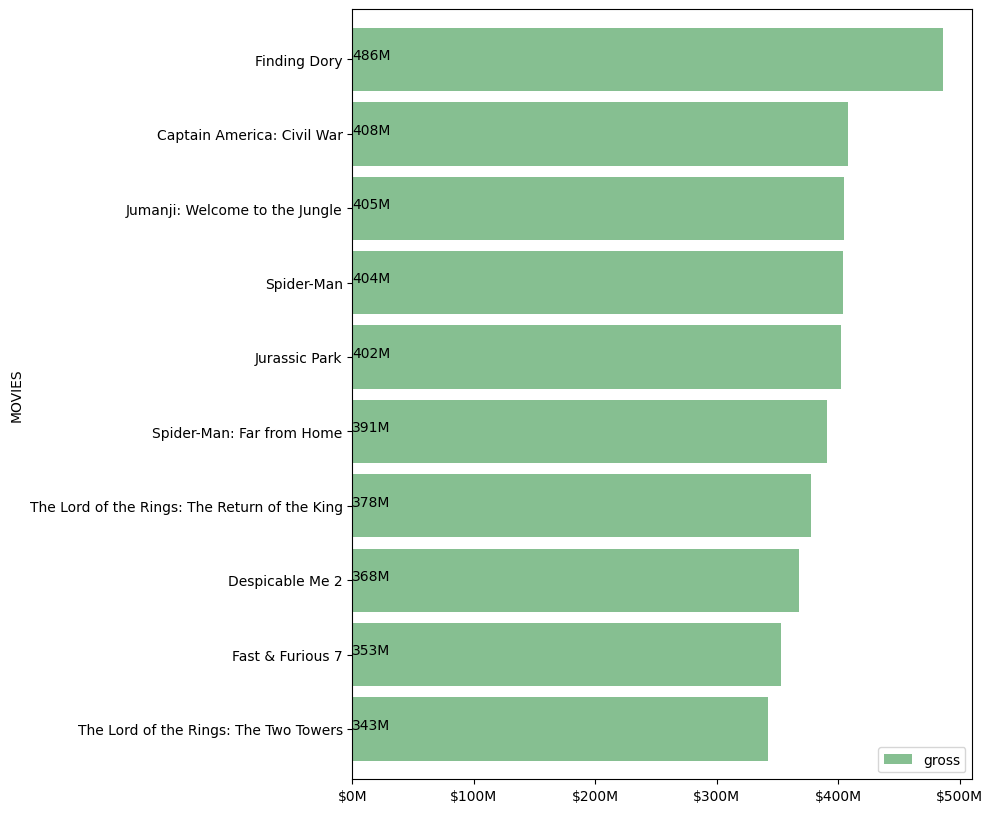

In [24]:
from matplotlib.ticker import StrMethodFormatter

df1 = data_clean(movies)

x = (df1
 .sort_values(by='gross',ascending=True)
 .tail(10)
 [['gross','MOVIES']]
 .set_index('MOVIES')
 #.plot.barh(y='gross',x='MOVIES')
)

ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
x_ticks = ax.get_xticks()

ax.set_xticklabels(['${:.0f}M'.format(xt*1e-6) for xt in x_ticks])
#ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

for i, v in enumerate(x.gross):
    num =  v*1e-6
    ax.text(num, i, f'{num:.0f}M')

/tmp/ipykernel_32/695325088.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:.0f}M'.format(xt*1e-6) for xt in x_ticks])


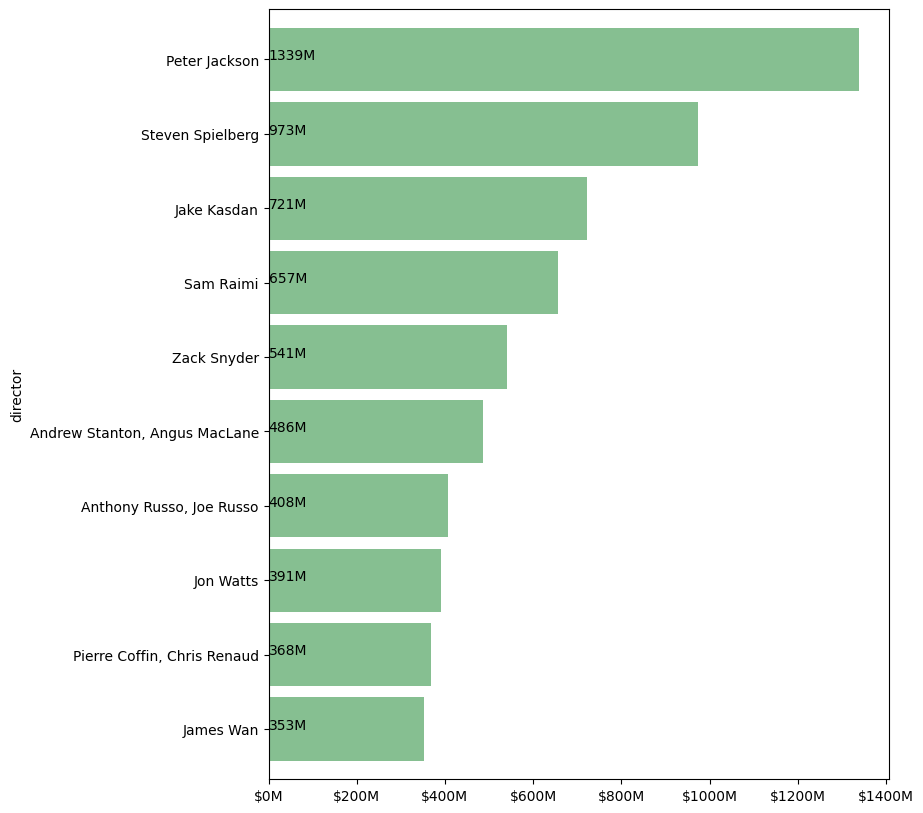

In [26]:
dir_g= (df1
 .drop(columns='year')
 .groupby('director')
 .sum()
 .sort_values(by='gross', ascending=True)
 .tail(10)
 ['gross']
 #.plot.barh(y='gross',x='MOVIES')
)

ax = dir_g.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
x_ticks = ax.get_xticks()
#ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_xticklabels(['${:.0f}M'.format(xt*1e-6) for xt in x_ticks])

for i, v in enumerate(dir_g):
    num =  v*1e-6
    ax.text(num, i, f'{num:.0f}M')

In [30]:
(df1['year'].agg(['min','max']))

min   1941-01-01
max   2020-01-01
Name: year, dtype: datetime64[ns]

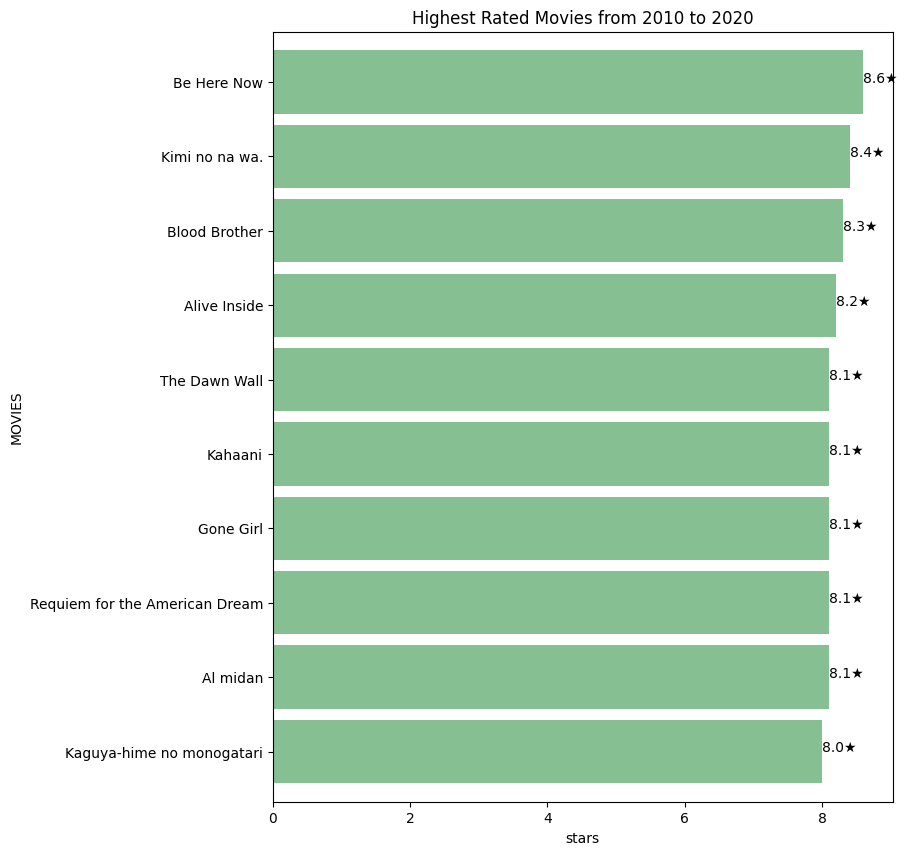

In [60]:
filt = ((df1['year'] < pd.to_datetime('2021')) & (df1['year'] > pd.to_datetime('2010')))

best_rated_movies = (df1.loc[filt]
    .sort_values(by='RATING')
    .tail(10)
    .set_index('MOVIES')
    ['RATING']
)

ax = best_rated_movies.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
ax.set_title('Highest Rated Movies from 2010 to 2020')
ax.set_xlabel('stars')
for i, v in enumerate(best_rated_movies):
    ax.text(v, i, f'{v:.1f}\u2605')

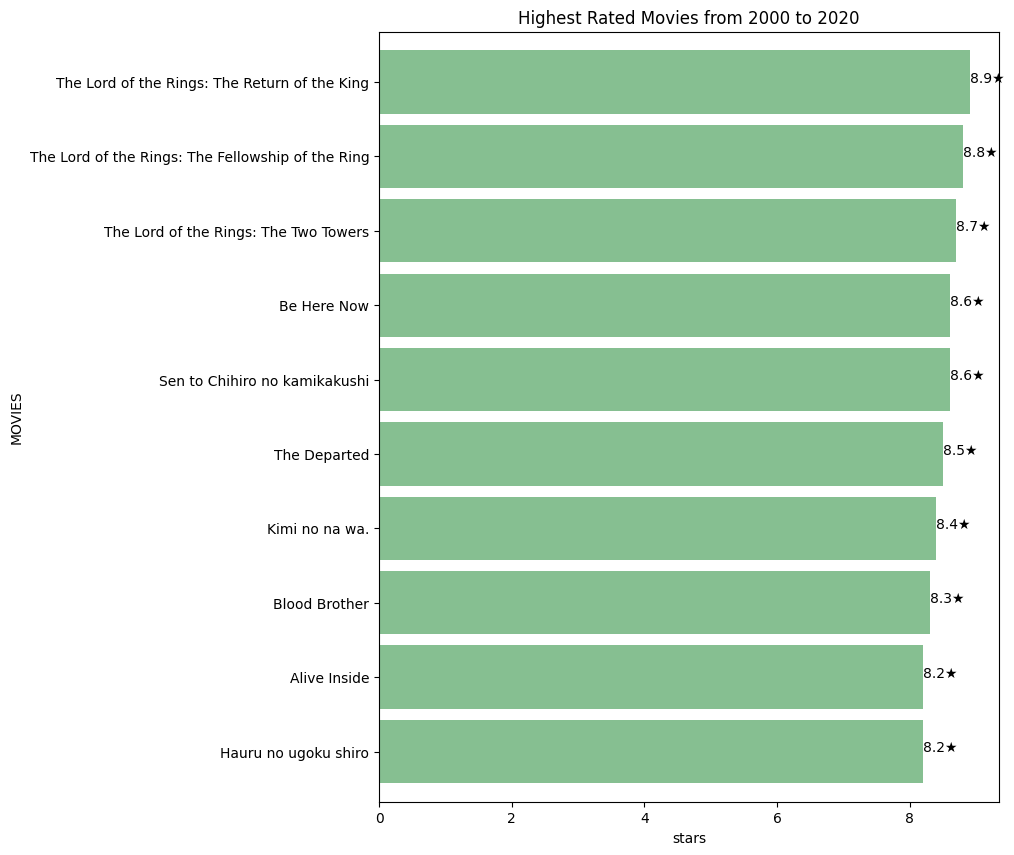

In [62]:
filt2 = ((df1['year'] <= pd.to_datetime('2020')) & (df1['year'] >= pd.to_datetime('2000')))

best_rated_movies = (df1.loc[filt2]
    .sort_values(by='RATING')
    .tail(10)
    .set_index('MOVIES')
    ['RATING']
)

ax = best_rated_movies.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
ax.set_title('Highest Rated Movies from 2000 to 2020')
ax.set_xlabel('stars')
for i, v in enumerate(best_rated_movies):
    ax.text(v, i, f'{v:.1f}\u2605')

<Axes: title={'center': 'Top 10 Most Popular Genres from 2010 to 2020'}>

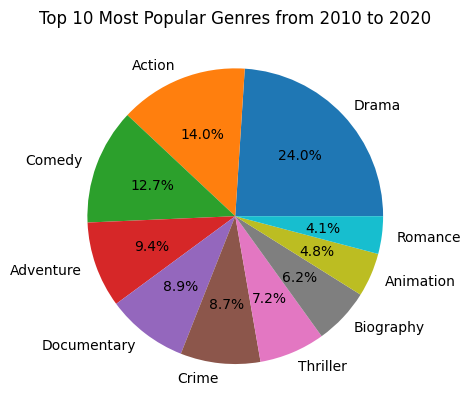

In [86]:
filt = ((df1['year'] < pd.to_datetime('2021')) & (df1['year'] > pd.to_datetime('2010')))

count_df = (df1[filt].iloc[:,8:11]
    .apply(pd.Series.value_counts)
)

(pd.DataFrame({'count':count_df.sum(axis=1).to_list()},
              index=count_df.index).astype({'count':'int16'})
   .sort_values(by='count', ascending=False)
   .head(10)
   .plot.pie(y='count', autopct='%1.1f%%', legend=False, 
             title='Top 10 Most Popular Genres from 2010 to 2020', ylabel='')
 
)

<Axes: title={'center': 'Top 10 Most Popular Genres from 2000 to 2020'}>

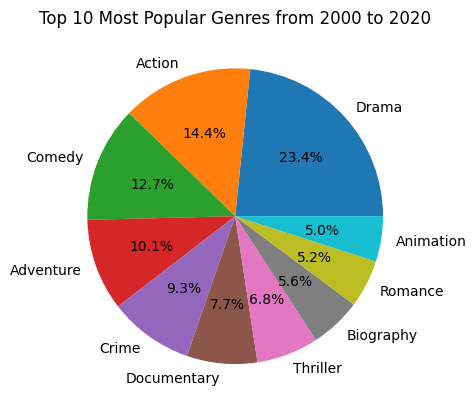

In [87]:
filt2 = ((df1['year'] <= pd.to_datetime('2020')) & (df1['year'] >= pd.to_datetime('2000')))

count_df2 = (df1[filt2].iloc[:,8:11]
    .apply(pd.Series.value_counts)
)

(pd.DataFrame({'count':count_df2.sum(axis=1).to_list()},
              index=count_df2.index).astype({'count':'int16'})
   .sort_values(by='count', ascending=False)
   .head(10)
   .plot.pie(y='count', autopct='%1.1f%%', legend=False, 
             title='Top 10 Most Popular Genres from 2000 to 2020', ylabel='')
 
)